In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from pandas import Series

In [2]:
data = pd.read_csv('listings.csv')
data.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200212052255,2020-02-12,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.81
1,5858,https://www.airbnb.com/rooms/5858,20200212052255,2020-02-12,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.85
2,7918,https://www.airbnb.com/rooms/7918,20200212052255,2020-02-12,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,20200212052255,2020-02-12,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.12
4,8339,https://www.airbnb.com/rooms/8339,20200212052255,2020-02-12,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,moderate,t,t,2,2,0,0,0.22


Data Cleaning

In [4]:
data = data.drop(['listing_url','scrape_id','thumbnail_url','medium_url','picture_url',
           'xl_picture_url','host_url','host_name','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications',
          'smart_location','country_code','country','calendar_updated','calendar_last_scraped','first_review','last_review','jurisdiction_names','last_scraped'],axis = 1)

In [5]:
#Change the data type of price
data.price = data.price.str.strip('$')
data.price = data.price.replace(regex = ',',value = '')
data.price.astype(float)
data.price = data.price.astype(np.float)
data.availability_90 = data.availability_90.astype(np.float)
data.price.head()

0    170.0
1    235.0
2     65.0
3     65.0
4    741.0
Name: price, dtype: float64

In [52]:
data.amenities = data.amenities.replace(regex = ',',value = ' ')
data.amenities = data.amenities.str.lower()

In [6]:
#Add a revenue col
data["rev_90"] = data["price"]*(90-data["availability_90"])

In [9]:
for i in range(len(data)):
    if data.availability_365[i] == 0:
        data.rev_90[i] = float("nan")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
len(data)

8587

In [10]:
data.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,rev_90
count,8.587000e+03,8.587000e+03,8587.000000,8587.000000,0.0,8587.000000,8587.000000,8587.000000,8581.000000,8584.000000,...,6538.000000,6540.000000,6538.000000,6538.000000,8587.000000,8587.000000,8587.000000,8587.000000,6596.000000,7372.000000
mean,2.222735e+07,7.015010e+07,125.625247,125.625247,NaN,37.766753,-122.429681,3.125306,1.399604,1.335158,...,9.843683,9.806728,9.696849,9.383145,27.536858,22.920228,3.585187,0.848026,1.734729,8606.187873
std,1.339201e+07,8.887342e+07,430.048727,430.048727,NaN,0.023035,0.027062,1.925444,0.926385,0.934706,...,0.613230,0.684268,0.725543,0.862705,65.101143,64.427152,8.273429,4.332428,2.031513,13725.034247
min,9.580000e+02,2.800000e+01,0.000000,0.000000,NaN,37.704450,-122.513060,1.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,1.017638e+07,4.462049e+06,1.000000,1.000000,NaN,37.752010,-122.442490,2.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.280000,1160.000000
50%,2.329306e+07,2.570744e+07,2.000000,2.000000,NaN,37.770250,-122.423840,2.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,0.960000,4860.000000
75%,3.416244e+07,1.074344e+08,17.000000,17.000000,NaN,37.786370,-122.410325,4.000000,1.500000,2.000000,...,10.000000,10.000000,10.000000,10.000000,13.000000,2.000000,2.000000,0.000000,2.580000,10730.000000
max,4.222550e+07,3.351966e+08,2137.000000,2137.000000,NaN,37.817040,-122.367020,16.000000,14.000000,16.000000,...,10.000000,10.000000,10.000000,10.000000,281.000000,281.000000,43.000000,36.000000,28.690000,340000.000000


Room type VS. Price

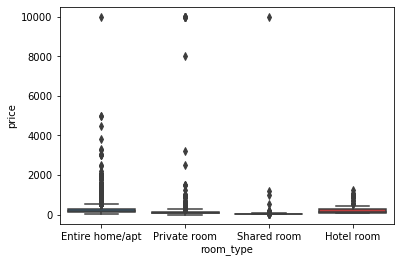

In [26]:
#Evidence of outliers 
sns.boxplot(x="room_type", y="price", data=data, orient = "v")

In [64]:
data.room_type.value_counts()

Entire home/apt    5076
Private room       3098
Shared room         302
Hotel room          111
Name: room_type, dtype: int64

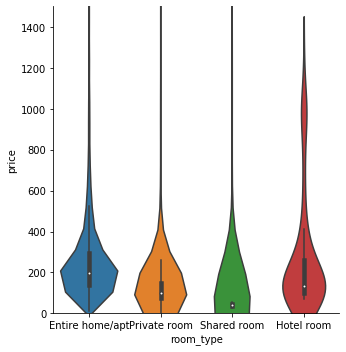

In [44]:
#After remove the outliers
plotone = sns.catplot(x="room_type", y="price",kind="violin", data=data, orient = "v")
plotone.set(ylim=(0,1500))

Availability Vs. Price

In [11]:
data.availability_90.describe()

count    8587.000000
mean       42.457552
std        34.206045
min         0.000000
25%         4.000000
50%        42.000000
75%        76.000000
max        90.000000
Name: availability_90, dtype: float64

In [19]:
data.rev_90.describe()

count      7372.000000
mean       8606.187873
std       13725.034247
min           0.000000
25%        1160.000000
50%        4860.000000
75%       10730.000000
max      340000.000000
Name: rev_90, dtype: float64

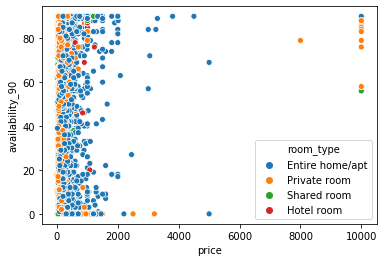

In [12]:
sns.scatterplot(x="price",y="availability_90",hue= "room_type",data=data)

D:\Anaconda\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


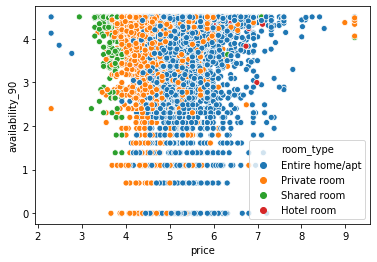

In [13]:
log = np.log(data.availability_90)
log_p = np.log(data.price)
sns.scatterplot(x=log_p,y=log,hue= "room_type",data=data)

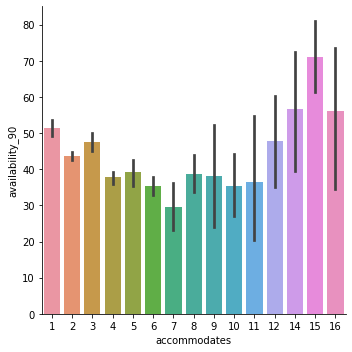

In [14]:
sns.catplot(x="accommodates", y="availability_90",kind="bar", data=data, orient = "v")

In [79]:
data.bedrooms.unique()

array([ 1.,  2.,  0.,  3.,  4., nan,  5.,  6., 14.,  7.,  8., 16.,  9.])

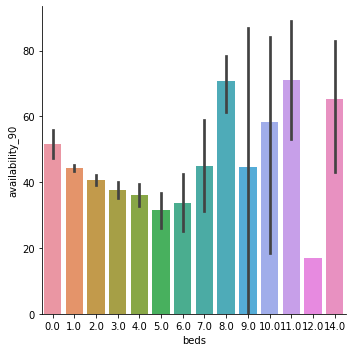

In [15]:
sns.catplot(x="beds", y="availability_90",kind="bar", data=data, orient = "v")

Rev Vs 各种

[Text(0, 0, 'moderate'),
 Text(0, 0, 'strict_14_with_grace_period'),
 Text(0, 0, 'flexible'),
 Text(0, 0, 'super_strict_30'),
 Text(0, 0, 'strict'),
 Text(0, 0, 'super_strict_60'),
 Text(0, 0, 'luxury_moderate')]

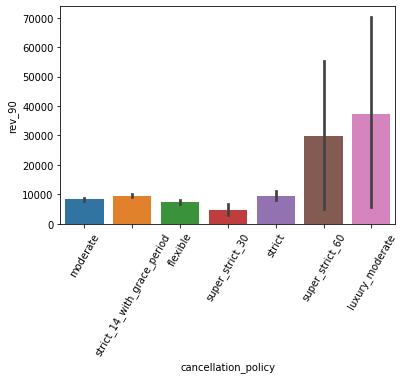

In [73]:
chart = sns.barplot(x="cancellation_policy",y="rev_90",data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

[Text(0, 0, 'moderate'),
 Text(0, 0, 'strict_14_with_grace_period'),
 Text(0, 0, 'flexible'),
 Text(0, 0, 'super_strict_30'),
 Text(0, 0, 'strict'),
 Text(0, 0, 'super_strict_60'),
 Text(0, 0, 'luxury_moderate')]

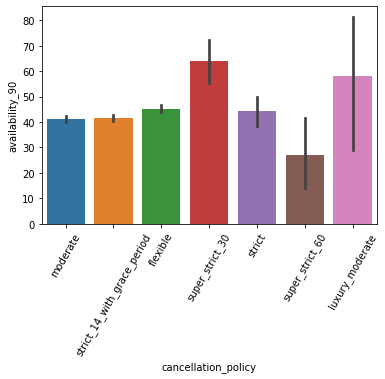

In [74]:
chart = sns.barplot(x="cancellation_policy",y="availability_90",data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

[Text(0, 0, 'moderate'),
 Text(0, 0, 'strict_14_with_grace_period'),
 Text(0, 0, 'flexible'),
 Text(0, 0, 'super_strict_30'),
 Text(0, 0, 'strict'),
 Text(0, 0, 'super_strict_60'),
 Text(0, 0, 'luxury_moderate')]

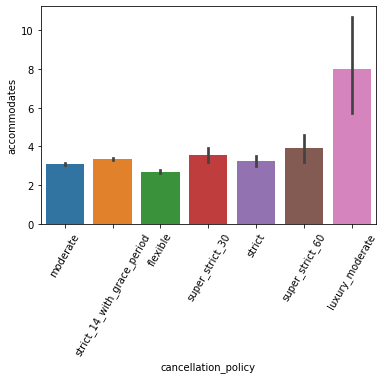

In [76]:
chart = sns.barplot(x="cancellation_policy",y="accommodates",data=data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)

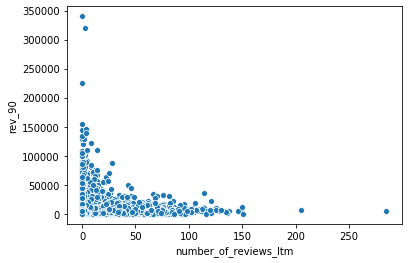

In [17]:
sns.scatterplot(x="number_of_reviews_ltm",y="rev_90",data=data)

Amenities

In [53]:
data.amenities

0       {tv "cable tv" internet wifi kitchen "pets liv...
1       {internet wifi kitchen heating "family/kid fri...
2       {tv internet wifi kitchen "free street parking...
3       {tv internet wifi kitchen "free street parking...
4       {tv internet wifi kitchen "free street parking...
                              ...                        
8582    {tv "cable tv" wifi kitchen "pets allowed" ele...
8583    {tv "cable tv" wifi kitchen "pets allowed" ele...
8584    {tv wifi kitchen "pets allowed" gym elevator "...
8585    {tv wifi kitchen "pets allowed" gym elevator "...
8586    {tv wifi kitchen "free parking on premises" "f...
Name: amenities, Length: 8587, dtype: object

In [54]:
porter=PorterStemmer()

def stemSentence(sentence):
    stem_sentence=[]
    for word in sentence:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [55]:
FullText = data.amenities.apply(lambda x: stemSentence(x))

In [56]:
frequency = word_tokenize(" ".join(data.amenities))
table = Series(frequency)
frequency_table = table.value_counts()

In [58]:
frequency_table

``                127187
''                127187
detector           15437
dryer              13601
tv                 10318
                   ...  
media                  1
faucets                1
driveway               1
touchless              1
ski-in/ski-out         1
Length: 325, dtype: int64

Review score

[(0, 150000)]

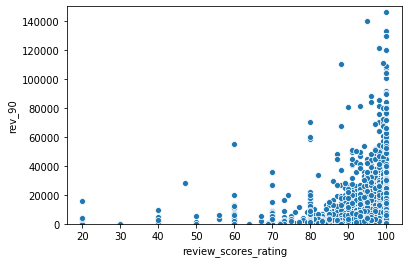

In [79]:
plottwo = sns.scatterplot(x="review_scores_rating",y="rev_90",data=data)
plottwo.set(ylim=(0,150000))

[(0, 150000)]

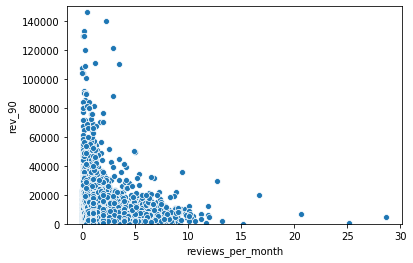

In [80]:
plottwo = sns.scatterplot(x="reviews_per_month",y="rev_90",data=data)
plottwo.set(ylim=(0,150000))

Cross Scater

In [95]:
CS_data = data[["accommodates","bathrooms","bedrooms","bed_type","square_feet","price","availability_90","number_of_reviews","rev_90"]]

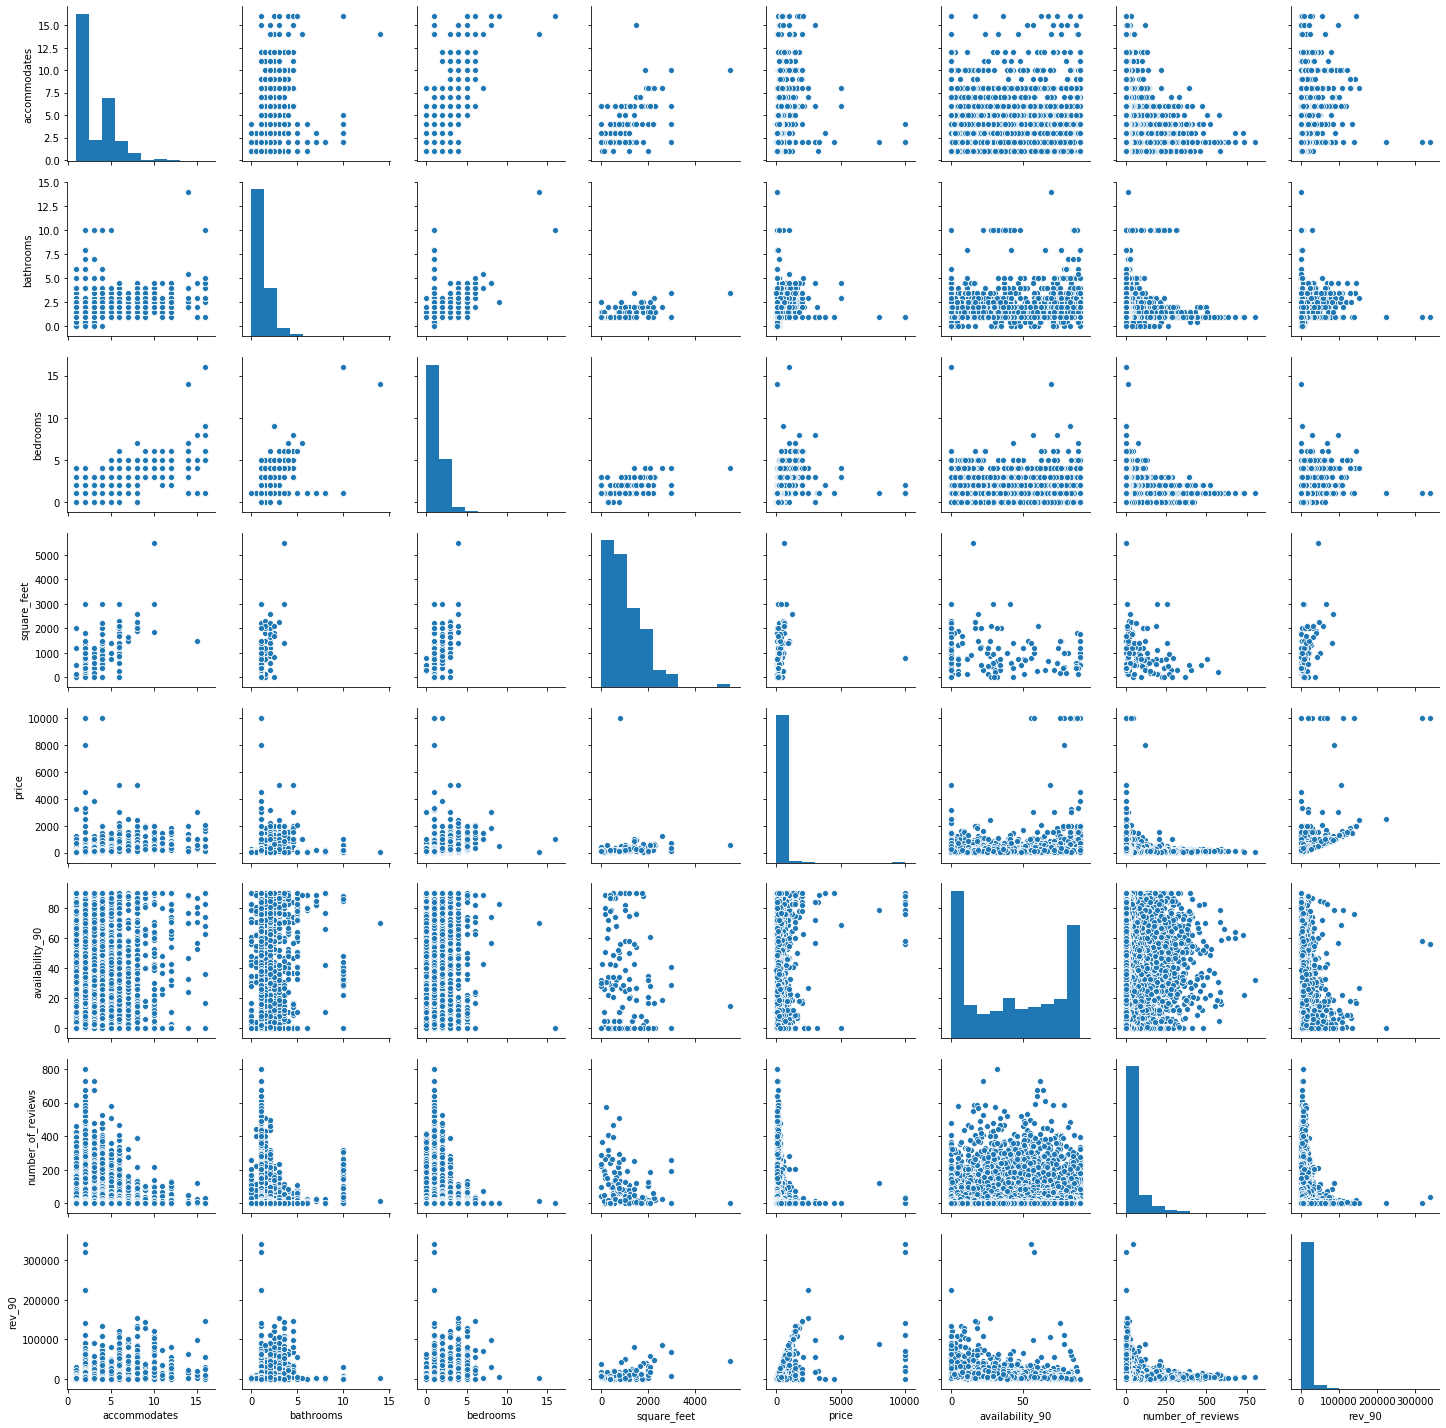

In [96]:
g = sns.pairplot(CS_data)